In [1]:
# Binary trees.
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.tree import \
    DecisionTreeRegressor  # Source: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html
from sklearn.tree import \
    DecisionTreeClassifier  # Source: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

In [2]:
#Configuration.
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
# Ingestion.
# inputPath to the CSV file.
inputPath = os.path.join(os.path.expanduser("~"), "development", "dgef-data-science",
                         "exercises", "module3_part_1",
                         "data", "evaluacion-modulo-3-clasificacion.csv")

# Prints the absolute inputPath to the CSV file.
print("The input CSV file is: ", inputPath)

# Reads the CSV data file.
sourceMatrix = pd.read_csv(inputPath, dtype='str', encoding="ISO-8859-1")
sourceMatrix[["Y", "X1", "X2"]] = sourceMatrix[["Y", "X1", "X2"]].astype(float)
print(sourceMatrix.head())

The input CSV file is:  /home/lneumann/development/dgef-data-science/exercises/module3_part_1/data/evaluacion-modulo-3-clasificacion.csv
     Y        X1        X2
0  0.0  0.455427  0.141295
1  1.0  0.616538  0.716436
2  0.0  0.909646  0.142389
3  0.0  0.564656  0.078458
4  0.0  0.193780  0.333579


In [4]:
# Mean square error function.
def meanSquareErrorFunction(v1, v2):
    accumulator, columns = 0, len(v1)

    for i in range(columns):
        accumulator = accumulator + (v1[1] - v2[1]) ** 2
    return (accumulator ** 0.5) / columns

In [5]:
# Binary tree construction.
# Transforming data as a Numpy array.
X_training_set = np.asarray(sourceMatrix[["X1", "X2"]].copy(deep=True).reset_index(drop=True))
X_testing_set = np.asarray(sourceMatrix[["X1", "X2"]].copy(deep=True).reset_index(drop=True))
Y_training_set = np.asarray(sourceMatrix[["Y"]].copy(deep=True).reset_index(drop=True))
Y_testing_set = np.asarray(sourceMatrix[["Y"]].copy(deep=True).reset_index(drop=True))

In [6]:
# Calculation using python scikit-learn defined functions.
# scikit-learn method comparison.

# Decision tree regressor method.
decisionTreeRegressor = DecisionTreeRegressor(max_depth=2)
decisionTreeRegressor.fit(X_training_set, Y_training_set)
Y_predicted_set1 = decisionTreeRegressor.predict(X_testing_set)
meanSquareError1 = meanSquareErrorFunction(Y_predicted_set1, Y_testing_set)
print("Decision Tree Regressor (DTR) mean square error = ", meanSquareError1)

Decision Tree Regressor (DTR) mean square error =  [0.00145435]


In [7]:
# Decision tree classification procedure using the entropy function.
decisionTreeClassifier = DecisionTreeClassifier(criterion='entropy')
decisionTreeClassifier.fit(X_training_set, Y_training_set)
Y_predicted_set2 = decisionTreeClassifier.predict(X_testing_set)
meanSquareError2 = meanSquareErrorFunction(Y_predicted_set2, Y_testing_set)
print("Decision Tree Classifier (DTC) with entropy criterion mean square error = ", meanSquareError2)

Decision Tree Classifier (DTC) with entropy criterion mean square error =  [0.]


In [8]:
# Data frame definition to compare the results.
compareMatrix = pd.DataFrame(index=range(len(Y_predicted_set2)),
                             columns=["Real data", "DTR Approximate data", "DTC Approximate data"])
compareMatrix["Real data"] = Y_testing_set
compareMatrix["DTR Approximate data"] = Y_predicted_set1
compareMatrix["DTC Approximate data"] = Y_predicted_set2

print("Prediction compare matrix:")
print(compareMatrix)

Prediction compare matrix:
     Real data  DTR Approximate data  DTC Approximate data
0          0.0              0.021552                   0.0
1          1.0              0.967480                   1.0
2          0.0              0.035294                   0.0
3          0.0              0.021552                   0.0
4          0.0              0.021552                   0.0
5          0.0              0.021552                   0.0
6          1.0              0.967480                   1.0
7          0.0              0.035294                   0.0
8          1.0              0.967480                   1.0
9          1.0              0.967480                   1.0
10         0.0              0.021552                   0.0
11         1.0              0.967480                   1.0
12         0.0              0.021552                   0.0
13         1.0              0.967480                   1.0
14         1.0              0.967480                   1.0
15         0.0              0

In [9]:
# Confusion matrix.
print("******************* DTC Binary tree confusion matrix *******************")
print(confusion_matrix(Y_testing_set, Y_predicted_set2))

******************* DTC Binary tree confusion matrix *******************
[[356   0]
 [  0 144]]


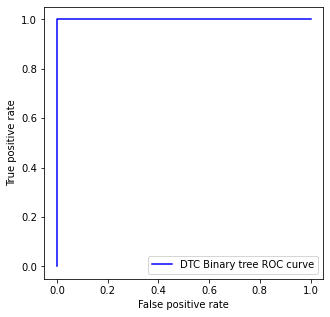

In [10]:
# ROC curve compute.
Y_predicted_set2_prob = decisionTreeClassifier.predict_proba(X_testing_set)[:, 1]
X_rate, Y_rate, _ = roc_curve(Y_testing_set, Y_predicted_set2_prob)
fig = plt.figure(figsize=(5., 5.))
ax = fig.add_subplot(1, 1, 1)
plt.plot(X_rate, Y_rate, color="blue", linestyle="-", label="DTC Binary tree ROC curve")
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc='best', ncol=2)
plt.show()

In [11]:
# Area under the ROC curve.
print("DTC Binary tree area under the ROC curve is", roc_auc_score(Y_testing_set, Y_predicted_set2_prob))


DTC Binary tree area under the ROC curve is 1.0
